In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv('housing_price_dataset.csv')

# Menampilkan dataset
df

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
0,2126,4,1,Rural,1969,215355.283618
1,2459,3,2,Rural,1980,195014.221626
2,1860,2,1,Suburb,1970,306891.012076
3,2294,2,1,Urban,1996,206786.787153
4,2130,5,2,Suburb,2001,272436.239065
...,...,...,...,...,...,...
49995,1282,5,3,Rural,1975,100080.865895
49996,2854,2,2,Suburb,1988,374507.656727
49997,2979,5,3,Suburb,1962,384110.555590
49998,2596,5,2,Rural,1984,380512.685957


In [2]:
# Menampilkan kategori di variaabel 'Neighborhood'
df['Neighborhood'].value_counts()

Neighborhood
Suburb    16721
Rural     16676
Urban     16603
Name: count, dtype: int64

In [3]:
# Statistik deskriptif
print(df.describe())

# Menampilkan informasi umum dataset
print(df.info())

         SquareFeet      Bedrooms     Bathrooms     YearBuilt          Price
count  50000.000000  50000.000000  50000.000000  50000.000000   50000.000000
mean    2006.374680      3.498700      1.995420   1985.404420  224827.325151
std      575.513241      1.116326      0.815851     20.719377   76141.842966
min     1000.000000      2.000000      1.000000   1950.000000  -36588.165397
25%     1513.000000      3.000000      1.000000   1967.000000  169955.860225
50%     2007.000000      3.000000      2.000000   1985.000000  225052.141166
75%     2506.000000      4.000000      3.000000   2003.000000  279373.630052
max     2999.000000      5.000000      3.000000   2021.000000  492195.259972
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   SquareFeet    50000 non-null  int64  
 1   Bedrooms      50000 non-null  int64  
 2   Bathrooms     50000 no

In [4]:
# Menampilkan data yang hilang
df.isnull().sum()

SquareFeet      0
Bedrooms        0
Bathrooms       0
Neighborhood    0
YearBuilt       0
Price           0
dtype: int64

In [5]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
# Convert 'Neighborhoof' to binary
df['Neighborhood'] = df['Neighborhood'].apply(lambda x: 0 if x == 'Suburb' else 1 if x == 'Rural' else 2)
df

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
0,2126,4,1,1,1969,215355.283618
1,2459,3,2,1,1980,195014.221626
2,1860,2,1,0,1970,306891.012076
3,2294,2,1,2,1996,206786.787153
4,2130,5,2,0,2001,272436.239065
...,...,...,...,...,...,...
49995,1282,5,3,1,1975,100080.865895
49996,2854,2,2,0,1988,374507.656727
49997,2979,5,3,0,1962,384110.555590
49998,2596,5,2,1,1984,380512.685957


In [6]:
df = df.iloc[1:501, :]
df

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
1,2459,3,2,1,1980,195014.221626
2,1860,2,1,0,1970,306891.012076
3,2294,2,1,2,1996,206786.787153
4,2130,5,2,0,2001,272436.239065
5,2095,2,3,0,2020,198208.803907
...,...,...,...,...,...,...
496,1127,4,1,0,1965,127174.722595
497,1017,5,1,0,1996,127458.039009
498,2816,5,2,0,1974,356063.829221
499,2758,3,3,2,2006,344787.619393


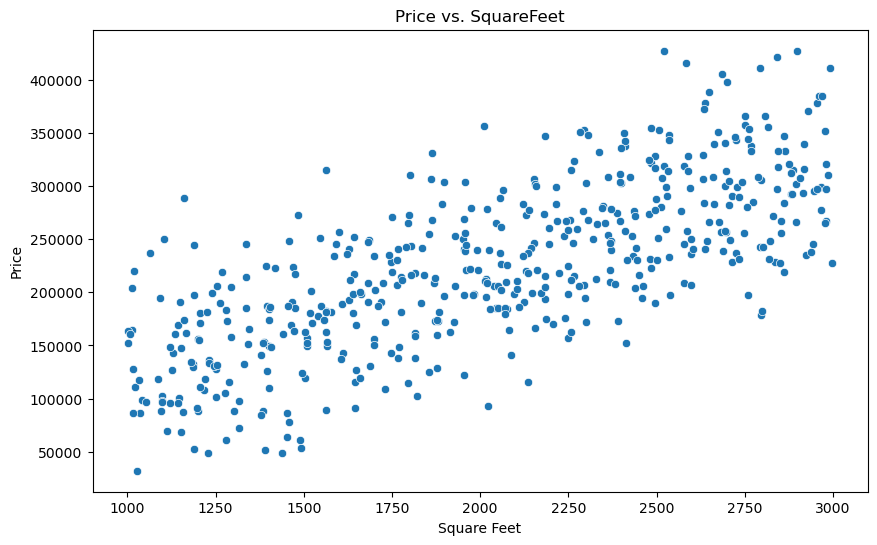

In [7]:
# Scatter plot for Price vs. SquareFeet
plt.figure(figsize=(10, 6))
sns.scatterplot(x='SquareFeet', y='Price', data=df)
plt.title('Price vs. SquareFeet')
plt.xlabel('Square Feet')
plt.ylabel('Price')
plt.show()

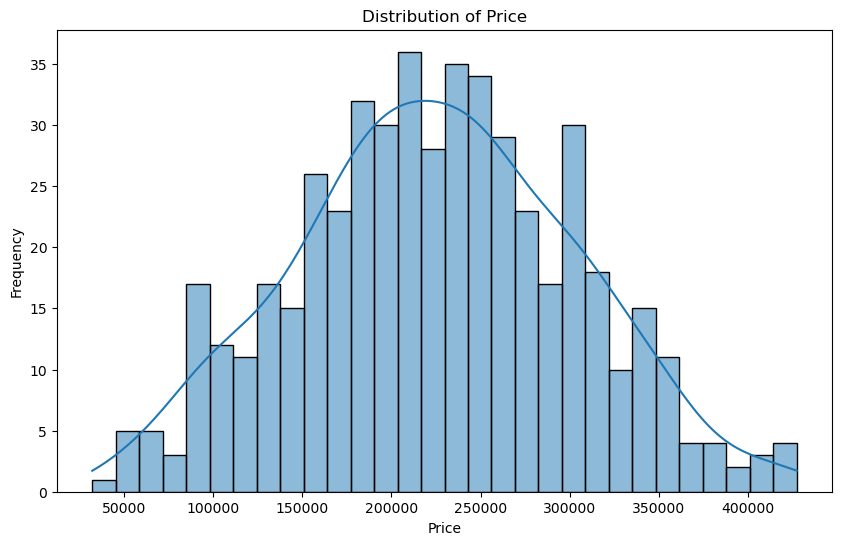

In [8]:
# Histogram for Price
plt.figure(figsize=(10, 6))
sns.histplot(df['Price'], bins=30, kde=True)
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


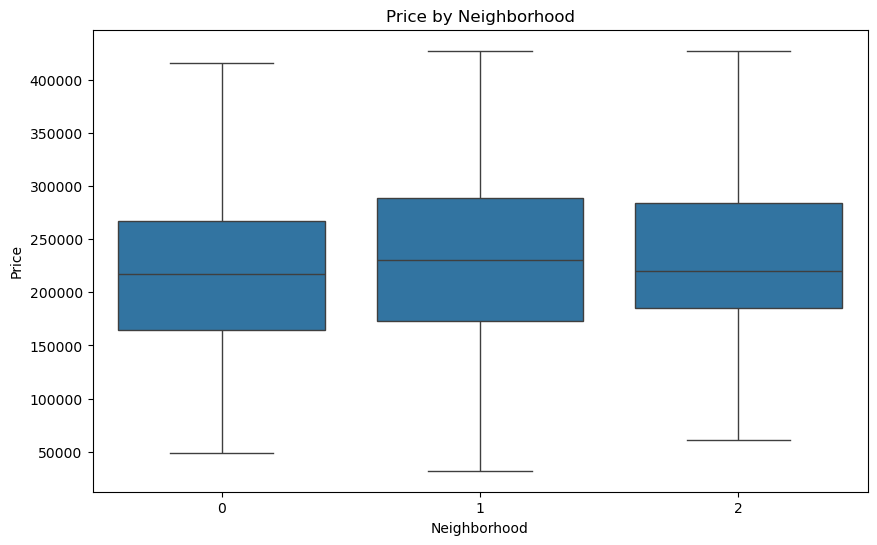

In [9]:
# Box plot for Price by Neighborhood
plt.figure(figsize=(10, 6))
sns.boxplot(x='Neighborhood', y='Price', data=df)
plt.title('Price by Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('Price')
plt.show()

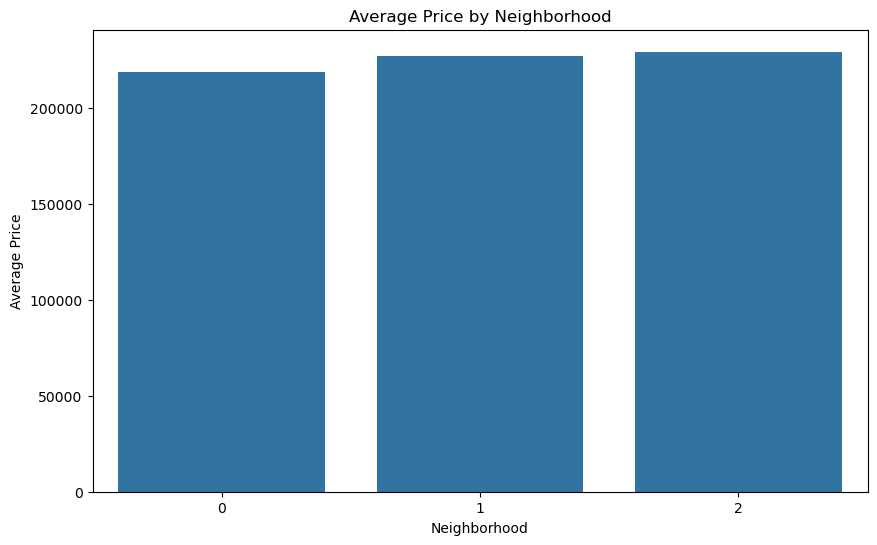

In [10]:
# Bar chart for Average Price by Neighborhood
plt.figure(figsize=(10, 6))
avg_price_neighborhood = df.groupby('Neighborhood')['Price'].mean().reset_index()
sns.barplot(x='Neighborhood', y='Price', data=avg_price_neighborhood)
plt.title('Average Price by Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('Average Price')
plt.show()

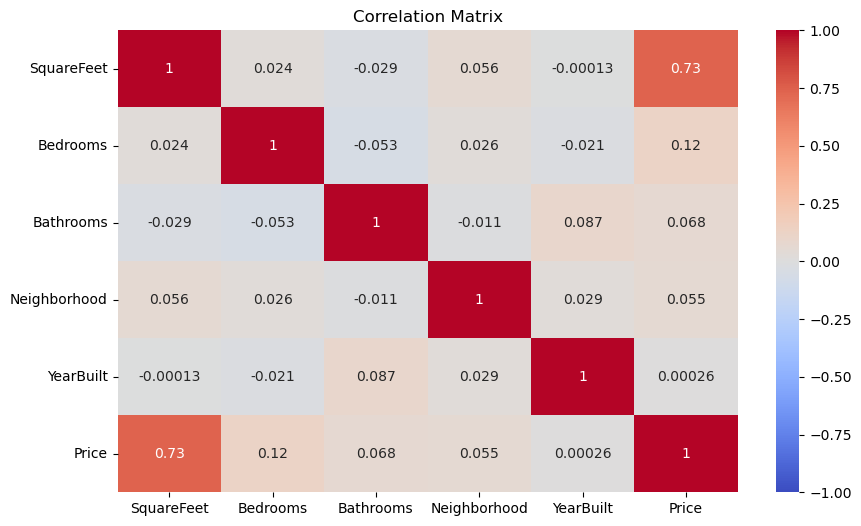

In [11]:
# Heatmap for correlation matrix
plt.figure(figsize=(10, 6))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()


In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score

# Assuming housing_data is your DataFrame and 'Price' is your target variable
# Define bins and labels
bins = [0, 200000, 400000, 600000, 800000, np.inf]
labels = ['Low', 'Medium', 'High', 'Very High', 'Luxury']

# Create a new column 'PriceCategory' with binned values
df['PriceCategory'] = pd.cut(df['Price'], bins=bins, labels=labels)

/var/folders/cq/q0zx6_r53qz5ql9b77dkkbzw0000gn/T/ipykernel_40920/3621522890.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['PriceCategory'] = pd.cut(df['Price'], bins=bins, labels=labels)


In [13]:
# Define features and target
X = df[['SquareFeet', 'Bedrooms', 'Bathrooms', 'Neighborhood', 'YearBuilt']]
y = df['PriceCategory']

# One-hot encode categorical features
X = pd.get_dummies(X, drop_first=True)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [14]:
# Model Training and Comparison
def evaluate_model(y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    return accuracy, precision, recall, f1

# Logistic Regression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
accuracy_lr, precision_lr, recall_lr, f1_lr = evaluate_model(y_test, y_pred_lr)

# Decision Tree
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
accuracy_dt, precision_dt, recall_dt, f1_dt = evaluate_model(y_test, y_pred_dt)

# SVM
svm = SVC()
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
accuracy_svm, precision_svm, recall_svm, f1_svm = evaluate_model(y_test, y_pred_svm)

# Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
accuracy_rf, precision_rf, recall_rf, f1_rf = evaluate_model(y_test, y_pred_rf)

# Print accuracy and classification report for each model
print(f'Akurasi Logistic Regression: {accuracy_lr}')
print("Laporan Klasifikasi Logistic Regression:\n", classification_report(y_test, y_pred_lr))

print(f'Akurasi Decision Tree: {accuracy_dt}')
print("Laporan Klasifikasi Decision Tree:\n", classification_report(y_test, y_pred_dt))

print(f'Akurasi SVM: {accuracy_svm}')
print("Laporan Klasifikasi SVM:\n", classification_report(y_test, y_pred_svm))

print(f'Akurasi Random Forest: {accuracy_rf}')
print("Laporan Klasifikasi Random Forest:\n", classification_report(y_test, y_pred_rf))


Akurasi Logistic Regression: 0.74
Laporan Klasifikasi Logistic Regression:
               precision    recall  f1-score   support

         Low       0.72      0.62      0.67        42
      Medium       0.75      0.83      0.79        58

    accuracy                           0.74       100
   macro avg       0.74      0.72      0.73       100
weighted avg       0.74      0.74      0.74       100

Akurasi Decision Tree: 0.63
Laporan Klasifikasi Decision Tree:
               precision    recall  f1-score   support

        High       0.00      0.00      0.00         0
         Low       0.60      0.50      0.55        42
      Medium       0.67      0.72      0.69        58

    accuracy                           0.63       100
   macro avg       0.42      0.41      0.41       100
weighted avg       0.64      0.63      0.63       100

Akurasi SVM: 0.73
Laporan Klasifikasi SVM:
               precision    recall  f1-score   support

         Low       0.71      0.60      0.65        42

/Users/dian/anaconda3/envs/dateng/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/dian/anaconda3/envs/dateng/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/dian/anaconda3/envs/dateng/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/dian/anaconda3/envs/daten

In [15]:
# Best Model
model = LogisticRegression(max_iter=1000)

# Latih model
model.fit(X_train, y_train)

# Lakukan prediksi
y_pred = model.predict(X_test)

# Evaluasi model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(report)

Accuracy: 0.74
Classification Report:
              precision    recall  f1-score   support

         Low       0.72      0.62      0.67        42
      Medium       0.75      0.83      0.79        58

    accuracy                           0.74       100
   macro avg       0.74      0.72      0.73       100
weighted avg       0.74      0.74      0.74       100



In [16]:
# Contoh data input
input_data = (2537, 726.379, 1672.436, 2, 2024)

# Mengonversi data input menjadi array numpy
input_data_as_numpy_array = np.array(input_data[:-1])

# Menambahkan YearBuilt ke array
input_data_with_year = np.append(input_data_as_numpy_array, input_data[-1])

# Menyediakan dataframe untuk one-hot encoding
input_df = pd.DataFrame([input_data_with_year], columns=['SquareFeet', 'Bedrooms', 'Bathrooms', 'Neighborhood', 'YearBuilt'])

# One-hot encode
input_df = pd.get_dummies(input_df, drop_first=True)

# Pastikan input_df memiliki kolom yang sama dengan X_train
missing_cols = set(X_train.columns) - set(input_df.columns)
for c in missing_cols:
    input_df[c] = 0
input_df = input_df[X_train.columns]

# Melakukan prediksi
prediction = rf.predict(input_df)

# Memeriksa hasil prediksi
if prediction[0] == 'Low':
    print('Harga rumah dalam kategori Low')
elif prediction[0] == 'Medium':
    print('Harga rumah dalam kategori Medium')
elif prediction[0] == 'High':
    print('Harga rumah dalam kategori High')
elif prediction[0] == 'Very High':
    print('Harga rumah dalam kategori Very High')
else:
    print('Harga rumah dalam kategori Luxury')


Harga rumah dalam kategori Medium


In [17]:
import pickle

In [18]:
filename = 'house_price_predict.sav'
pickle.dump(model,open(filename,'wb'))

In [19]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [20]:
import numpy
import scipy
import sklearn
import pandas
import matplotlib

print("Numpy version:", numpy.__version__)
print("Scipy version:", scipy.__version__)
print("Scikit-learn version:", sklearn.__version__)
print("Pandas version:", pandas.__version__)
print("Matplotlib version:", matplotlib.__version__)

Numpy version: 1.26.4
Scipy version: 1.12.0
Scikit-learn version: 1.3.0
Pandas version: 2.2.1
Matplotlib version: 3.8.4
